In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")

1(a)

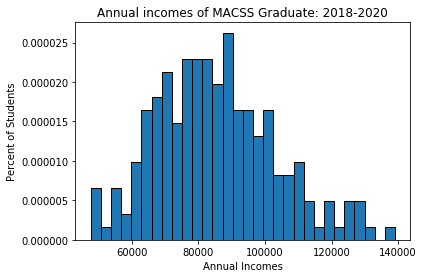

In [2]:
# Load Data file.
Incomes = np.loadtxt('incomes.txt')

# Plot data
fig,ax = plt.subplots()
ax.set_xlabel('Annual Incomes')
ax.set_ylabel('Percent of Students')
ax.set_title('Annual incomes of MACSS Graduate: 2018-2020')
ax.hist(x=Incomes, bins=30, normed = True, edgeColor = 'k')
plt.show()

(b)

mu_GMM1= 11.331880861821642  sig_GMM1= 0.20869665294140646
Mean of points = 85276.82360625811 , Standard deviation of points = 17992.542128046523
Mean of model = 85276.82499059364 , Standard deviation of model = 17992.541656041056
Error vector= [ 1.62334321e-08 -2.62333952e-08]
GMM criterion function 9.51715339683538e-16


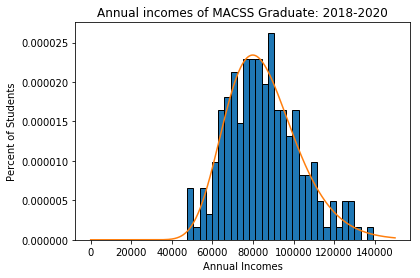

In [34]:
def trunc_lognorm_pdf(xvals, mu, sigma):
    pdf_vals    = ((1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    1.0) 
    return pdf_vals
def data_moments(xvals):
    mean_data = xvals.mean()
    std_data = xvals.std()
    return mean_data, std_data
def model_moments(mu, sigma):
    mean_model = np.exp(mu+(sigma**2)/2)
    std_model = np.sqrt(np.exp(2*mu+sigma**2)*(np.exp(sigma**2)-1))
    return mean_model, std_model
def err_vec(data, mu, sigma, simple):
    mean_data, std_data = data_moments(data)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec
def criterion(params, *args):
    mu, sigma = params
    data, W = args
    err = err_vec(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val[0,0]

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)

gmm_args = (Incomes, W_hat)
results = opt.minimize(criterion, params_init, args=gmm_args, tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-2, None), (1e-2, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
mean_data, std_data = data_moments(Incomes)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(Incomes, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
print('Mean of model =', mean_model, ', Standard deviation of model =', std_model)
print('Error vector=', err1)
crit_val1 = criterion(results.x,*gmm_args)
print('GMM criterion function', crit_val1)

X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Annual Incomes')
ax.set_ylabel('Percent of Students')
ax.set_title('Annual incomes of MACSS Graduate: 2018-2020')
ax.hist(x=Incomes, bins=30, normed = True, edgeColor = 'k')
ax.plot(X, trunc_lognorm_pdf(X, mu_GMM1, sig_GMM1))
plt.show()

(c)

VCV2 = [[0.04451671 0.02724079]
 [0.02724079 0.40593057]]
W_hat2 = [[23.42542666 -1.57201052]
 [-1.57201052  2.5689684 ]]
mu_GMM2= 11.331880840687973  sig_GMM2= 0.20869665707488438
Mean of points = 85276.82360625811 , Standard deviation of points = 17992.542128046523
Mean of model2 = 85276.82326194478 , Standard deviation of model2 = 17992.541655493726
Error vector= [-4.03759565e-09 -2.62638150e-08]
GMM criterion function 1.820528642461473e-15


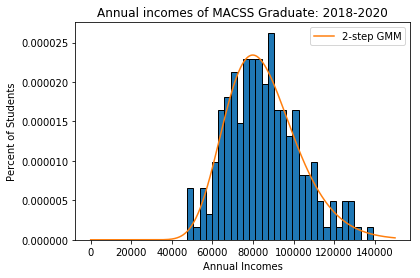

In [35]:
def get_Err_mat2(mu, sigma, data = Incomes, simple=False):
    R = 2
    N = len(data)
    Err_mat = np.zeros((R, N))
    mean_model, std_model = model_moments(mu, sigma)
    if simple:
        Err_mat[0, :] = data - mean_model
        Err_mat[1, :] = np.sqrt(((mean_data - data) ** 2)) - std_model
    else:
        Err_mat[0, :] = (data - mean_model) / mean_model
        Err_mat[1, :] = (np.sqrt(((mean_data - data) ** 2)) - std_model) / std_model
    
    return Err_mat
Err_mat = get_Err_mat2(mu_GMM1, sig_GMM1)
VCV2 = (1 / Incomes.shape[0]) * (Err_mat @ Err_mat.T)
print("VCV2 =", VCV2)
W_hat2 = np.linalg.pinv(VCV2)
print("W_hat2 =", W_hat2)


gmm_args = (Incomes, W_hat2)
new_results = opt.minimize(criterion, params_init, args=gmm_args, tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-2, None), (1e-2, None)))
mu_GMM2, sig_GMM2 = new_results.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)
mean_data, std_data = data_moments(Incomes)
mean_model2, std_model2 = model_moments(mu_GMM2, sig_GMM2)
err2 = err_vec(Incomes, mu_GMM2, sig_GMM2, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
print('Mean of model2 =', mean_model2, ', Standard deviation of model2 =', std_model2)
print('Error vector=', err2)
crit_val2 = criterion(new_results.x,*gmm_args)
print('GMM criterion function', crit_val2)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Annual Incomes')
ax.set_ylabel('Percent of Students')
ax.set_title('Annual incomes of MACSS Graduate: 2018-2020')
ax.hist(x=Incomes, bins=30, normed = True, edgeColor = 'k')
ax.plot(X, trunc_lognorm_pdf(X, mu_GMM2, sig_GMM2), label = '2-step GMM')
ax.legend()
plt.show()

(d)

mu_GMM1= 11.336726646612961  sig_GMM1= 0.2117464203585874
GMM criterion function 2.3818173309027643e-05
Moment 1 of points = 0.3 ,Moment 2 of points = 0.5 ,Moment 3 of points = 0.2
Moment 1 of model = 0.2992724536795648 ,Moment 2 of model = 0.49805745520366185 ,Moment 3 of model = 0.1996627832569382
Error vector= [[-0.00242515]
 [-0.00388509]
 [-0.00168608]]


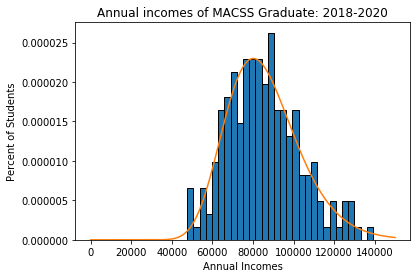

In [33]:
def data_moments_c(xvals):
    bpct_1_dat = xvals[xvals <75000].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=75000) & (xvals < 100000)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = xvals[xvals >= 100000].shape[0] / xvals.shape[0]
    return bpct_1_dat, bpct_2_dat, bpct_3_dat
def model_moments_c(mu, sigma):
    xfx = lambda x: trunc_lognorm_pdf(x, mu, sigma)
    (bpct_1_mod, bp_1_err) = quad(xfx, 0.0, 75000)
    (bpct_2_mod, bp_2_err) = quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err) = quad(xfx, 100000, 150000)
    return bpct_1_mod, bpct_2_mod, bpct_3_mod
def err_vec_c(xvals, mu, sigma, simple):
    bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments_c(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments_c(mu, sigma)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec
def criterion_c(params, *args):
    mu, sigma = params
    data, W = args
    err = err_vec_c(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val[0,0]
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(3)
gmm_args2 = (Incomes, W_hat)
new_results = opt.minimize(criterion_c, params_init, args=gmm_args2, tol=1e-14,
                       method='L-BFGS-B',bounds=((1e-2, None), (1e-2, None)))
new_mu_GMM1 = new_results.x[0]
new_sig_GMM1 = new_results.x[1]
print('mu_GMM1=', new_mu_GMM1, ' sig_GMM1=', new_sig_GMM1)
new_crit_val1 = criterion_c(new_results.x,*gmm_args2)
print('GMM criterion function', new_crit_val1)
moment1_data, moment2_data, moment3_data = data_moments_c(Incomes)
moment1_model, moment2_model, moment3_model = model_moments_c(new_mu_GMM1, new_sig_GMM1)
new_err1 = err_vec_c(Incomes, new_mu_GMM1, new_sig_GMM1, False).reshape(3,1)
print('Moment 1 of points =', moment1_data, ',Moment 2 of points =', moment2_data, ',Moment 3 of points =', moment3_data, )
print('Moment 1 of model =', moment1_model, ',Moment 2 of model =', moment2_model, ',Moment 3 of model =', moment3_model, )
print('Error vector=', new_err1)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Annual Incomes')
ax.set_ylabel('Percent of Students')
ax.set_title('Annual incomes of MACSS Graduate: 2018-2020')
ax.hist(x=Incomes, bins=30, normed = True, edgeColor = 'k')
ax.plot(X, trunc_lognorm_pdf(X, new_mu_GMM1, new_sig_GMM1))
plt.show()

(e)

[[ 2.34469793 -1.00633129 -1.00411998]
 [-1.00633129  1.00783091 -1.00558917]
 [-1.00411998 -1.00558917  4.01352571]]
[[ 9903.50119415 16481.11008149  6607.04108994]
 [16481.11008149 27428.69275559 10995.57137155]
 [ 6607.04108994 10995.57137155  4408.16647756]]
mu_GMM2= 11.31715555285508  sig_GMM2= 0.17463852089407092
GMM criterion function 0.05484904064592078
Moment 1 of points = 0.3 ,Moment 2 of points = 0.5 ,Moment 3 of points = 0.2
Moment 1 of model = 0.29934007690298664 ,Moment 2 of model = 0.5695161505563369 ,Moment 3 of model = 0.1308558462075311
Error vector= [[-0.00219974]
 [ 0.1390323 ]
 [-0.34572077]]


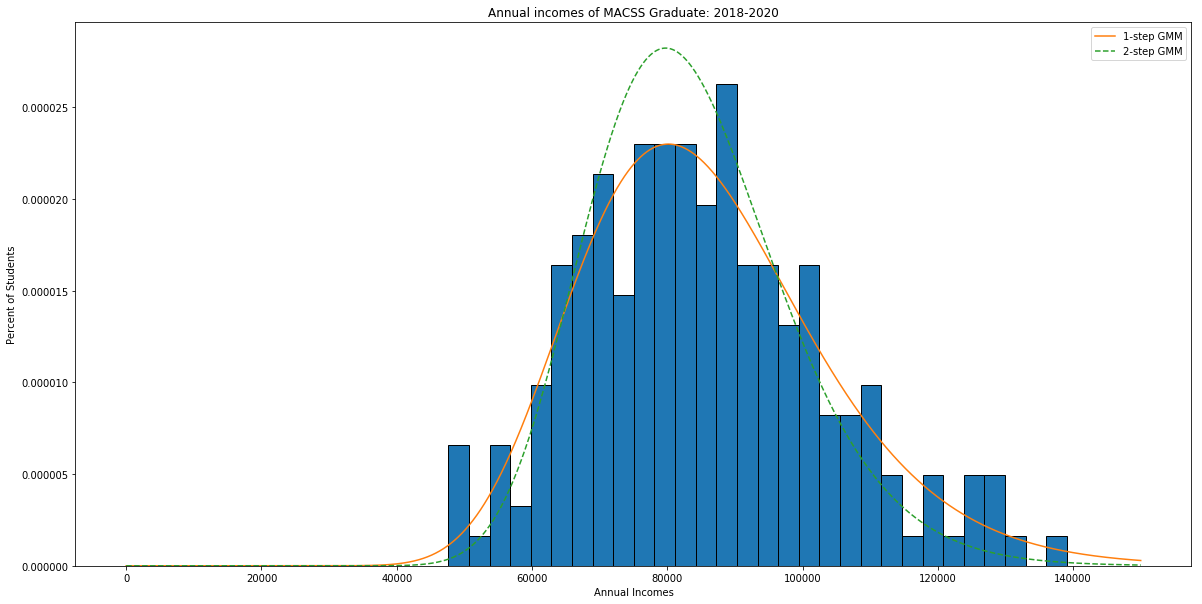

In [32]:
def get_Err_mat_d(mu, sigma, data = Incomes, simple=False):
    R = 3
    N = len(data)
    Err_mat = np.zeros((R, N))
    moment1,moment2,moment3 = model_moments_c(mu, sigma)
    if simple:
        Err_mat[0, :] = (data<75000) - moment1
        Err_mat[1, :] = (data<=100000)&(data>=75000) - moment2
        Err_mat[2, :] = (data>100000) - moment3
    else:
        Err_mat[0, :] = ((data<75000) - moment1)/moment1
        Err_mat[1, :] = (((data<=100000)&(data>=75000)) - moment2)/moment2
        Err_mat[2, :] = ((data>100000) - moment3)/moment3
    
    return Err_mat
new_Err_mat = get_Err_mat_d(new_mu_GMM1, new_sig_GMM1)
new_VCV2 = (1 / Incomes.shape[0]) * (new_Err_mat @ new_Err_mat.T)
print(new_VCV2)
new_W_hat2 = np.linalg.pinv(new_VCV2)
print(new_W_hat2)
params_init = np.array([new_mu_GMM1, new_sig_GMM1])
new_gmm_args2 = (Incomes, new_W_hat2)
new_results2 = opt.minimize(criterion_c, params_init, args=new_gmm_args2, tol=1e-14,
                       method='L-BFGS-B',bounds=((1e-2, None), (1e-2, None)))
new_mu_GMM2, new_sig_GMM2 = new_results2.x
print('mu_GMM2=', new_mu_GMM2, ' sig_GMM2=', new_sig_GMM2)
new_crit_val2 = criterion_c(new_results2.x,*new_gmm_args2)
print('GMM criterion function', new_crit_val2)
moment1_data, moment2_data, moment3_data = data_moments_c(Incomes)
moment1_model, moment2_model, moment3_model = model_moments_c(new_mu_GMM2, new_sig_GMM2)
new_err2 = err_vec_c(Incomes, new_mu_GMM2, new_sig_GMM2, False).reshape(3,1)
print('Moment 1 of points =', moment1_data, ',Moment 2 of points =', moment2_data, ',Moment 3 of points =', moment3_data, )
print('Moment 1 of model =', moment1_model, ',Moment 2 of model =', moment2_model, ',Moment 3 of model =', moment3_model, )
print('Error vector=', new_err2)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Annual Incomes')
ax.set_ylabel('Percent of Students')
ax.set_title('Annual incomes of MACSS Graduate: 2018-2020')
ax.hist(x=Incomes, bins=30, normed = True, edgeColor = 'k')
ax.plot(X, trunc_lognorm_pdf(X, new_mu_GMM1, new_sig_GMM1), label = '1-step GMM')
ax.plot(X, trunc_lognorm_pdf(X, new_mu_GMM2, new_sig_GMM2), label = '2-step GMM', ls = '--')
ax.legend()
plt.show()

(f)
The best fitting model is the one is part(e) with smallest GMM criterion. 

2

In [31]:
def data_moments(xvals):
    N = xvals.shape[0]
    data_moments = np.zeros((N,1))
    for i in range(N):
        data_moments[i,0] = xvals[i,0]
    return data_moments
def model_moments(xvals, beta0, beta1, beta2, beta3):
    N = xvals.shape[0]
    model_moments = np.zeros((N,1))
    for i in range(N):
        model_moments[i,0] = beta0 + beta1*xvals[i,1]+beta2*xvals[i,2]+beta3*xvals[i,3]
    return model_moments
def err_vec(xvals, beta0, beta1, beta2, beta3, simple):
    moms_data = data_moments(xvals)
    moms_model = model_moments(xvals, beta0, beta1, beta2, beta3)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec
def criterion(params, *args):
    beta0, beta1, beta2, beta3 = params
    data, W = args
    err = err_vec(data, beta0, beta1, beta2, beta3, simple=True)
    crit_val = err.T @ W @ err
    return crit_val[0,0]
df = []
with open('sick.txt') as f:
    for line in f:
        line = line.strip().split(',')
        df.append(line)
df.pop(0)
for i in range(len(df)):
    df[i] = [float(x) for x in df[i]]
df = np.array(df)
parameters_init = np.array([1,0,0,0])
W_Hat = np.eye(200)
args = (df, W_Hat)
results = opt.minimize(criterion, parameters_init, args=args, tol=1e-14,
                       method='L-BFGS-B')
beta0_GMM, beta1_GMM, beta2_GMM, beta3_GMM = results.x
crit_val = criterion(results.x, *args)
print('beta0_GMM =',beta0_GMM)
print('beta1_GMM =',beta1_GMM)
print('beta2_GMM =',beta2_GMM) 
print('beta3_GMM =',beta3_GMM)
print('GMM criterion function value:', crit_val)

beta0_GMM = 0.2516448636180223
beta1_GMM = 0.012933469667256711
beta2_GMM = 0.40050098511048643
beta3_GMM = -0.009991708483433188
GMM criterion function value: 0.00182128980560192
